In [1]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

### INPUT

In [3]:
#general inputs
average_inflation = 0.02
average_interest = 0.03

#user inputs
monthly_amount_to_invest = 300
monthly_average_expenses = 700
#aktualne nasetrenona dannem produktu
savings_1 = 1000
#savings_2 = 100
#savings_3 = 0

### ALG

In [17]:
target_capital = (monthly_average_expenses*12)/0.04 # Future value in CZK
#0.04 - pochází z pravidla, že pravidelně můžete vybírat 4% u investované částky, 
#který pokryje v budoucnu měsíční náklady
n = 12
t = math.log((target_capital * average_interest / n + monthly_amount_to_invest)
                 / (savings_1 * average_interest / n + monthly_amount_to_invest)) \
        / (n * math.log(1 + average_interest / n))
print(f"Time required: {t:.2f} years")

def get_graph_data(t):
    # Generate x-axis (years from 0 to the current year + 51)
    x_axis = list(range(0, math.ceil(t)+1))
    year_axis = list(range(datetime.now().year, datetime.now().year + math.ceil(t) + 1))  # Fixed missing closing parenthesis
    y_axis = []
    
    for i in x_axis:
        target_capital = savings_1 * (1 + average_interest / n)**(n * i) + \
                         monthly_amount_to_invest * (((1 + average_interest / n)**(n * i) - 1) / (average_interest / n))
        y_axis.append(target_capital)
    
    return year_axis, y_axis

x_axis, y_axis = get_graph_data(t)

data = {'Years': x_axis, 'Future Value': y_axis}
df = pd.DataFrame(data)
df

Time required: 33.49 years


,Years,Future Value
0,2024,1000.000000
1,2025,4680.330787
2,2026,8472.602356
3,2027,12380.219494
4,2028,16406.690546
5,2029,20555.630568
6,2030,24830.764572
7,2031,29235.930866
8,2032,33775.084510
9,2033,38452.300854


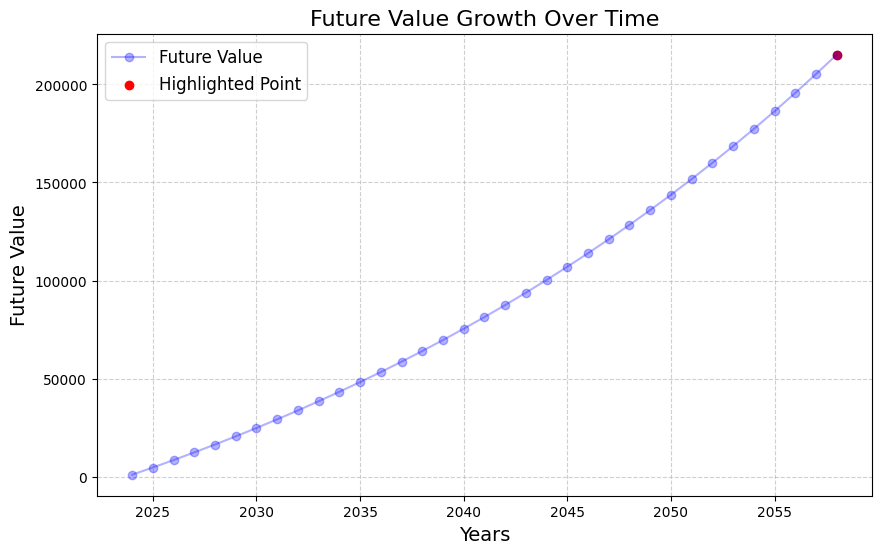

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x_axis, y_axis, label='Future Value', color='blue', marker='o', alpha=0.3) 
plt.title("Future Value Growth Over Time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Future Value", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
highlight_year = datetime.now().year + math.ceil(t)  # Calculated year
plt.scatter(highlight_year, y_axis[-1], color='red', label='Highlighted Point')  # Highlighted last y-axis value
plt.legend(fontsize=12)
plt.show()